In [4]:
import os
import pandas as pd
import numpy as np

import PIL
from basic_image_eda import BasicImageEDA

In [11]:
train_path = ".\scenery_dataset\seg_train\seg_train"
val_path = ".\scenery_dataset\seg_val\seg_val"
test_path = ".\scenery_dataset\seg_test\seg_test"

In [12]:
threads = 0
dimension_plot = True
channel_hist = True
nonzero = False
hw_division_factor = 1.0

def basic_eda(data_path):
    classes = os.listdir(data_path)
    print(f"There are {len(classes)} classes in this dataset")
    images = {}
    for i in classes:
        directory = os.path.join(data_path, i)
        files = os.listdir(directory)
        images[i] = files
    extensions = []
    for class_name, file_list in images.items():
        for f in file_list:
            ext = f.split('.')[-1]
            if ext not in extensions:
                extensions.append(ext)
    BasicImageEDA.explore(train_path, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor) 

# EDA on train_data

  0%|                                                                                                     | 0/14034 [00:00<?, ?it/s]

There are 6 classes in this dataset

found 14034 images.
Using 8 threads. (max:8)



100%|████████████████████████████████████████████████████████████████████████████████████████| 14034/14034 [00:16<00:00, 870.22it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  14034

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  76
max height                               |  150
mean height                              |  149.90872167592988
median height                            |  150

min width                                |  150
max width                                |  150
mean width                               |  150.0
median width                             |  150

mean height/width ratio                  |  0.9993914778395325
median height/width ratio                |  1.0
recommended input size(by mean)          |  [152 152] (h x w, multiples of 8)
recommended input size(by mean)          |  [144 144] (h x w, multiples of 16)
recommended input size(by mean)       

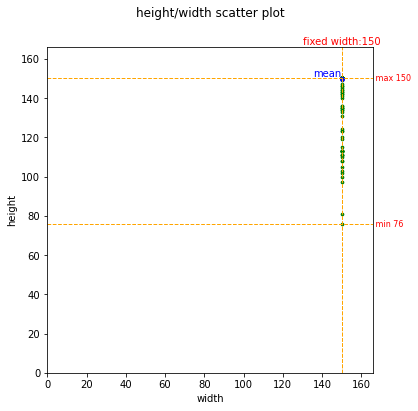

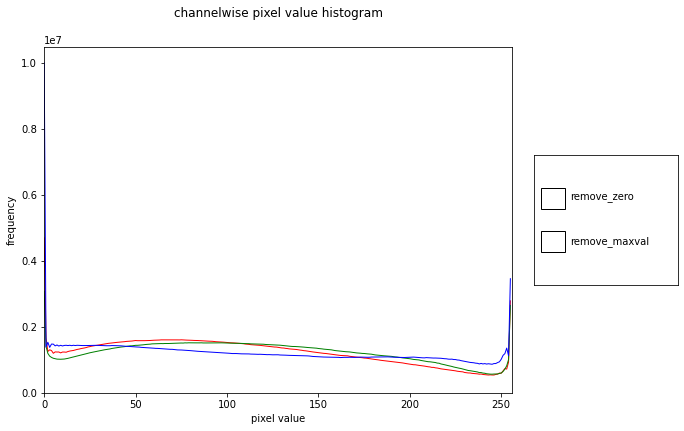

In [13]:
basic_eda(train_path)

# Explore images

In [1]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline # can omit plt.show() after using this magic liner, but seems not neccesary in jupyter notebook

In [16]:
# randomly choose one picture
pic=imageio.imread('./scenery_dataset/seg_train/seg_train/buildings/10006.jpg')
pic # the image object is just an array, where each pixel is a feature

Array([[[ 70, 121, 186],
        [ 71, 122, 185],
        [ 71, 121, 184],
        ...,
        [223, 223, 233],
        [219, 222, 231],
        [216, 219, 228]],

       [[ 73, 123, 186],
        [ 73, 123, 184],
        [ 72, 122, 183],
        ...,
        [233, 233, 241],
        [228, 231, 238],
        [226, 229, 236]],

       [[ 77, 123, 182],
        [ 76, 122, 181],
        [ 75, 121, 180],
        ...,
        [239, 240, 245],
        [235, 238, 243],
        [232, 235, 240]],

       ...,

       [[ 35,  36,  20],
        [ 49,  50,  32],
        [ 39,  42,  21],
        ...,
        [ 55,  41,  28],
        [ 62,  46,  33],
        [ 62,  46,  31]],

       [[ 22,  23,   9],
        [ 39,  40,  24],
        [ 39,  42,  21],
        ...,
        [ 80,  67,  51],
        [ 72,  56,  41],
        [ 57,  41,  25]],

       [[ 59,  60,  46],
        [ 13,  14,   0],
        [ 39,  42,  21],
        ...,
        [ 30,  17,   1],
        [ 73,  57,  41],
        [ 74,  58,  42]]

In [23]:
# so image is a 3D array, where 1st dim is height, 2nd 
height, width, channels = pic.shape
display(f"image height is {height}, which is the row in 3D array")
display(f"image width is {width}, which is the column in 3D array")
display(f"image channels is {channels}, which is the depth in 3D array")

'image height is 150, which is the row in 3D array'

'image width is 150, which is the column in 3D array'

'image channels is 3, which is the depth in 3D array'

In [9]:
# prepare a figure object
plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

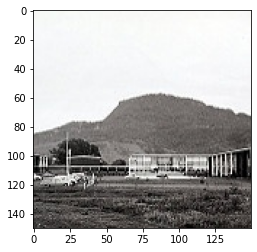

In [5]:
# display the image
plt.imshow(pic)

In [11]:
print('Type of the image: ',type(pic))
print('Shape of the image: {}'.format(pic.shape))
print('Image Hight: {}'.format(pic.shape[0]))
print('Image Width: {}'.format(pic.shape[1]))
print('Dimension of Image: {}'.format(pic.ndim))

Type of the image:  <class 'imageio.core.util.Array'>
Shape of the image: (150, 150, 3)
Image Hight: 150
Image Width: 150
Dimension of Image: 3


In [14]:
# pixel referencing, pick the pixel by x and y coordinates
pic[100, 100]

Array([110, 106, 103], dtype=uint8)

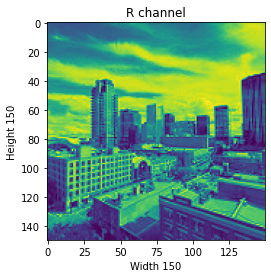

In [24]:
# now let’s take a quick view of each channels in the whole image.
plt.title('R channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[ : , : , 0])

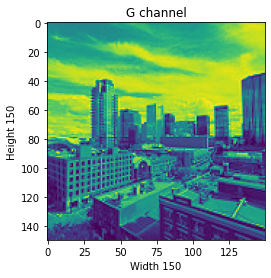

In [25]:
plt.title('G channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[ : , : , 1])

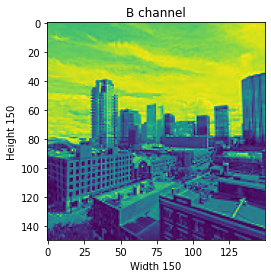

In [26]:
plt.title('B channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[ : , : , 2])

# Basic Statistics

In [27]:
import os

In [57]:
for root, dirs, files in os.walk(".\scenery_dataset\seg_train\seg_train", topdown=True):
    if len(files) != 0:
        print(root.split("\\")[-1], {len(files)})

buildings {2191}
forest {2271}
glacier {2404}
mountain {2512}
sea {2274}
street {2382}


# Image Preprocessing

- Resize image
- Remove noise(Denoise)
- Segmentation
- Morphology(smoothing edges)

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [14]:
SEED = 1
BATCH_SIZE = 32
img_height = 150
img_width = 150
AUTOTUNE = tf.data.AUTOTUNE

In [3]:
train_path = ".\scenery_dataset\seg_train\seg_train"
val_path = ".\scenery_dataset\seg_val\seg_val"
test_path = ".\scenery_dataset\seg_test\seg_test"

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  # label_mode="categorical", # categorical means one-hot encoding labels, corresponding to categorical_crossentropy loss
  seed=SEED,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE)

Found 14034 files belonging to 6 classes.


In [22]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_path,
  # label_mode="categorical",
  seed=SEED,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE)

Found 3000 files belonging to 6 classes.


In [23]:
train_ds = train_ds.take(3)
validation_ds = train_ds.take(1)

In [6]:
class_names = train_ds.class_names
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [7]:
for image, label in train_ds.take(1):
    print(label)

tf.Tensor([0 1 4 4 0 1 5 0 5 3 1 4 0 1 2 3 2 5 4 1 5 3 4 1 3 2 1 1 4 4 0 0], shape=(32,), dtype=int32)


In [8]:
for i in train_ds.take(1).as_numpy_iterator():
    print(i[0])

[[[[228. 241. 249.]
   [227. 240. 248.]
   [226. 241. 248.]
   ...
   [216. 233. 243.]
   [216. 233. 243.]
   [216. 233. 243.]]

  [[227. 240. 248.]
   [227. 240. 248.]
   [225. 240. 247.]
   ...
   [222. 236. 247.]
   [223. 237. 248.]
   [223. 237. 248.]]

  [[229. 242. 250.]
   [228. 241. 249.]
   [227. 240. 248.]
   ...
   [226. 239. 248.]
   [226. 239. 248.]
   [226. 239. 248.]]

  ...

  [[145. 157. 153.]
   [143. 154. 150.]
   [ 91. 100.  97.]
   ...
   [ 55.  60.  54.]
   [ 60.  62.  51.]
   [ 71.  72.  58.]]

  [[135. 146. 142.]
   [144. 155. 151.]
   [ 79.  88.  85.]
   ...
   [ 51.  58.  51.]
   [ 58.  61.  50.]
   [ 68.  70.  56.]]

  [[164. 175. 171.]
   [160. 171. 167.]
   [ 81.  87.  85.]
   ...
   [ 57.  64.  57.]
   [ 63.  66.  55.]
   [ 60.  62.  48.]]]


 [[[252. 252. 252.]
   [252. 252. 252.]
   [252. 252. 252.]
   ...
   [238. 233. 227.]
   [255. 253. 248.]
   [255. 253. 248.]]

  [[252. 252. 252.]
   [252. 252. 252.]
   [252. 252. 252.]
   ...
   [148. 143. 137.]
 

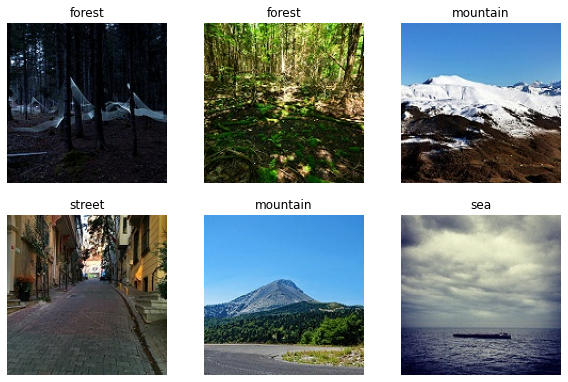

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [12]:
# Standardize the data so that the feature with a larger value does not overshadow the effects of the feature with a smaller value when learning a classifier 

In [32]:
# cache keeps the image on cache memory when they are loaded off the disk during 1st epoch
# prefetch overlaps preprocessing with training
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE).shuffle(buffer_size=train_ds.cardinality().numpy())
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Test Modelling

In [33]:
num_classes = len(class_names)
num_classes

6

In [34]:
model = tf.keras.Sequential([
  normalization_layer,
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [35]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [37]:
model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=10
)

Epoch 1/10
3/3 [==============================] - 0s 101ms/step - loss: 1.2219 - accuracy: 0.5208 - val_loss: 1.3655 - val_accuracy: 0.2812
Epoch 2/10
3/3 [==============================] - 0s 94ms/step - loss: 0.9986 - accuracy: 0.6250 - val_loss: 1.1938 - val_accuracy: 0.4375
Epoch 3/10
3/3 [==============================] - 0s 94ms/step - loss: 0.9065 - accuracy: 0.6458 - val_loss: 1.0615 - val_accuracy: 0.4688
Epoch 4/10
3/3 [==============================] - 0s 93ms/step - loss: 0.7677 - accuracy: 0.6667 - val_loss: 1.1421 - val_accuracy: 0.4375
Epoch 5/10
3/3 [==============================] - 0s 95ms/step - loss: 0.6527 - accuracy: 0.7396 - val_loss: 1.1152 - val_accuracy: 0.5312
Epoch 6/10
3/3 [==============================] - 0s 92ms/step - loss: 0.6608 - accuracy: 0.7188 - val_loss: 1.0456 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 0s 93ms/step - loss: 0.4647 - accuracy: 0.8438 - val_loss: 1.1675 - val_accuracy: 0.4375
Epoch 8/10
3/3 [==========

# Reference

In [ ]:
# https://www.tensorflow.org/tutorials/load_data/images